<h1><center>CSCI - 4146 - The Process of Data Science - Summer 2021</h1></center>
<h1><center>Assignment 1</h1></center>

<b>Mayuri Chilekar</b>  
B00925385  


<b>Deepak Hariharan</b>  
B00928025  

### 1. Business Understanding<a id='top'></a>

#### a) 1.1 Business Problem
In today’s marketplace, where consumers are more reliant than ever on online ratings and reviews for their dining decisions,some European restaurants are facing issues with high customer ratings and great reviews. The restaurant agency's wants to find out **a way to increase their revenue by improving thier ratings and customer reviews.**

#### b) 1.2 Solutions
**Solution 1:** __Customer rating prediction:__ A model could be built to predict the ratings that a customer is likely to give. Required data: Historical data of ratings for the restaurant. Required business capacity: The ability to provide additional personalized food options to customers.

**Solution 2:** __Returning customer prediction:__ A model could be built to predict whether a customer would return to the restaurant for continued business. Required data: Customer's purchase history and personal food preference details. Required business capacity: The ability to provide loyalty rewards or subcriptions to patrons.

**Solution 3:** __Target market prediction:__ A model could be built to predict which food would be popular among a targeted set of customers. Required data: Data about food,cuisines offered at the restaurant. Required business capacity: The ability to provide the preferred food according to the likings of the targeted set of customers.


**Preferred Solution**
__Customer rating prediction:__
    This is the best option for the aforementioned issue because it simply requires restaurant information and customer reviews to analyse and forecast outcomes, whereas the alternatives call for the usage of consumer data that we don't have access to. For exammple, option 2 requires information regarding the customer's past purchases and location, which isn't readily available, and solution 3 needs information about the nearby populations and their dietary preferences.


#### b) 1.3 Predective Subject: Customer Rating

**Domain Concepts:**
Restaurant Details: Information about the restaurant. 
Rating history: Information about ratings provided by customers.

**Sub-Concepts:**
restaurant name 
country
address
awards
features
vegetarian_friendly
vegan_options
gluten_free
avg_rating
total_reviews_count
cuisines
claimed
popularity_detailed
price_level
excellent
very_good
average
poor
terrible
food
service
atmosphere
value

**Hierarchical graph**


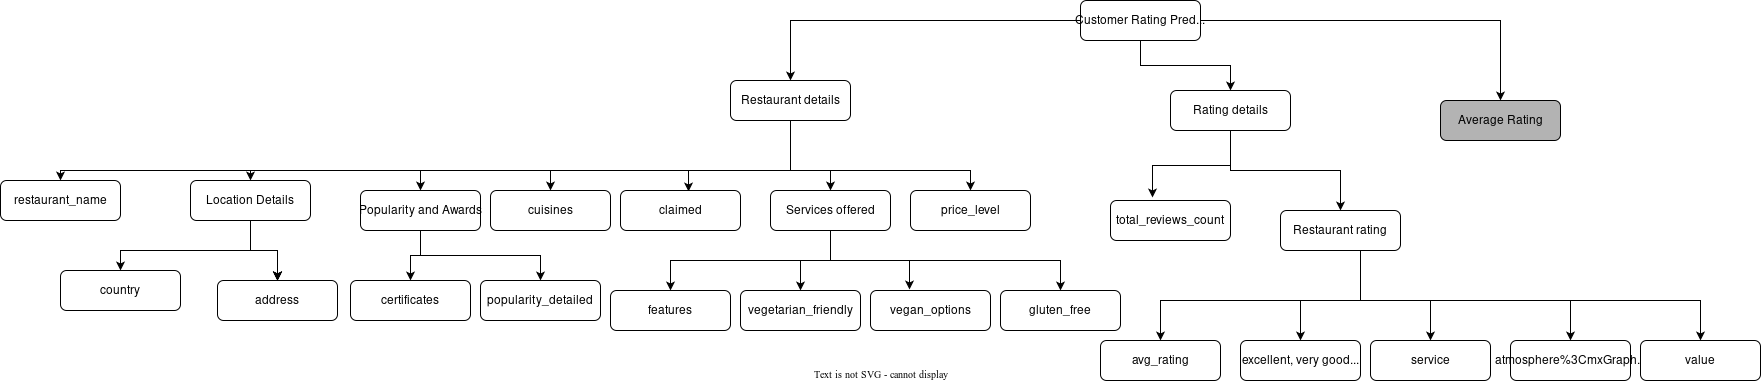

| Feature Name | Domain Concepts | Feature Description | Feature Type | Data Type
| :- | -: | :-: | :-: | :-: |
| restaurant name | Restaurant details | Name of the restaurant | Categorical | object
| country | Rating details | country where restaurants loacted | Categorical | object
| address | Restaurant details | address of the restaurant | Categorical | object
| awards |  | certificates received by the restaurants | Categorical | object
| features |  | services provided by the restaurants | Categorical | object
| vegetarian_friendly |  | does the restaurant provide vegetarian_friendly option? | Categorical | object
| vegan_options | | does the restaurant provide vegan diet option? | Categorical | object
| gluten_free |  | does the restaurant provide gluten_free  option? | Categorical | object
| avg_rating |  | provides information about average rating of restaurants | Categorical | object
| total_reviews_count |  | provides information about total review count | Categorical | object
| cuisines | | provides infromation about cuisine options  | Categorical | object
| claimed |  | does the restaurant claim the review? | Categorical | object
| popularity_detailed |  | gives infromation about the popularity of restaurant in the area | Continuous | float64
| price_level |  | information about the food offered at restaurant of on scale of 1-5 | Continuous | float64
| excellent |  | excellent rating count  | Continuous | float64
| poor |  | poor rating count | Continuous | float64
| terrible |  | terrible rating count | Continuous | float64
| average |  | average rating count | Continuous | float64
| very_good |  | very_good rating count | Continuous | float64
| food |  | overall rating given to the food by the customers | Continuous | float64
| service |  | overall rating given to the service by the customers | Continuous | float64
| atmosphere |  | overall rating given to the atmosphere by the customers | Continuous | float64
| value |  | overall rating given to the value by the customers | Continuous | float64





In [73]:
import pandas as pd
import warnings
df = pd.read_csv("T:\\Term 1\\Process of Data Science\\Assignment1\\tripadvisor_european_restaurants.csv")
df = df.drop(df.index[500000:])
df.drop(['original_location','region','province','city','restaurant_link','latitude','longitude','top_tags','popularity_generic','price_range','special_diets','meals','original_open_hours','open_days_per_week','open_hours_per_week','working_shifts_per_week','default_language','reviews_count_in_default_language','keywords'],axis=1,inplace=True)
total_reviews_count = df[df['total_reviews_count'] < 50.].index
df = df.drop(total_reviews_count)

C:\Users\AVuser\AppData\Local\Temp\ipykernel_18572\2939584476.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("T:\\Term 1\\Process of Data Science\\Assignment1\\tripadvisor_european_restaurants.csv")


In [50]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188983 entries, 5 to 499999
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   restaurant_name      188983 non-null  string 
 1   country              188983 non-null  string 
 2   address              188983 non-null  string 
 3   claimed              188684 non-null  string 
 4   awards               103227 non-null  string 
 5   popularity_detailed  157908 non-null  string 
 6   price_level          166580 non-null  string 
 7   cuisines             170401 non-null  string 
 8   features             51435 non-null   string 
 9   vegetarian_friendly  188983 non-null  string 
 10  vegan_options        188983 non-null  string 
 11  gluten_free          188983 non-null  string 
 12  avg_rating           157418 non-null  Float64
 13  total_reviews_count  157429 non-null  Int64  
 14  excellent            157997 non-null  Int64  
 15  very_good        

### 2. Data Exploration

#### a)  2.1 Data quality report


**Continuous feature report**

In [51]:
def build_continuous_features_report(data_df):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

build_continuous_features_report(df)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
avg_rating,188983,16.702561,9,1.0,4.0,4.032992,4.0,4.5,5.0,0.538584
total_reviews_count,188983,16.696740,2345,50.0,78.0,226.678236,130.0,254.0,33731.0,340.966923
excellent,188983,16.396184,1057,0.0,2.0,34.013690,8.0,29.0,5110.0,93.641632
very_good,188983,16.396184,522,0.0,1.0,15.595492,5.0,15.0,4091.0,39.422327
average,188983,16.396184,288,0.0,0.0,5.658734,1.0,5.0,1682.0,16.795243
poor,188983,16.396184,199,0.0,0.0,3.051204,1.0,2.0,525.0,9.311472
terrible,188983,16.396184,230,0.0,0.0,3.685659,1.0,3.0,589.0,11.331027
food,188983,16.797807,9,1.0,4.0,4.099677,4.0,4.5,5.0,0.511773
service,188983,16.764471,9,1.0,4.0,4.071401,4.0,4.5,5.0,0.522235
value,188983,16.764471,9,1.0,3.5,3.949984,4.0,4.5,5.0,0.521531


**Categorical features report**


In [52]:
def build_categorical_features_report(data_df):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list())

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        #"Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        #"2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    continuous_data_df = data_df[cat_feat_names] 
    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())
    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df
build_categorical_features_report(df)

,Count,Miss %,Card.,Mode Freq,Mode %,2nd Mode Freq,2nd Mode %
restaurant_name,188983,0.000000,156922,940,0.497399,831,0.439722
country,188983,0.000000,9,69023,36.523391,61524,32.555309
address,188983,0.000000,184183,14,0.007408,13,0.006879
claimed,188983,0.158215,2,115417,61.072689,73267,38.769096
awards,188983,45.377627,794,6929,3.666467,6371,3.371203
popularity_detailed,188983,16.443278,157566,3,0.001587,680,0.359821
price_level,188983,11.854505,3,129767,68.665965,26999,14.286470
cuisines,188983,9.832630,21788,14617,7.734558,12065,6.384172
features,188983,72.783266,14379,2270,1.201166,1645,0.870449
vegetarian_friendly,188983,0.000000,2,100585,53.224364,88398,46.775636


**Data Visualization for Continuous features**

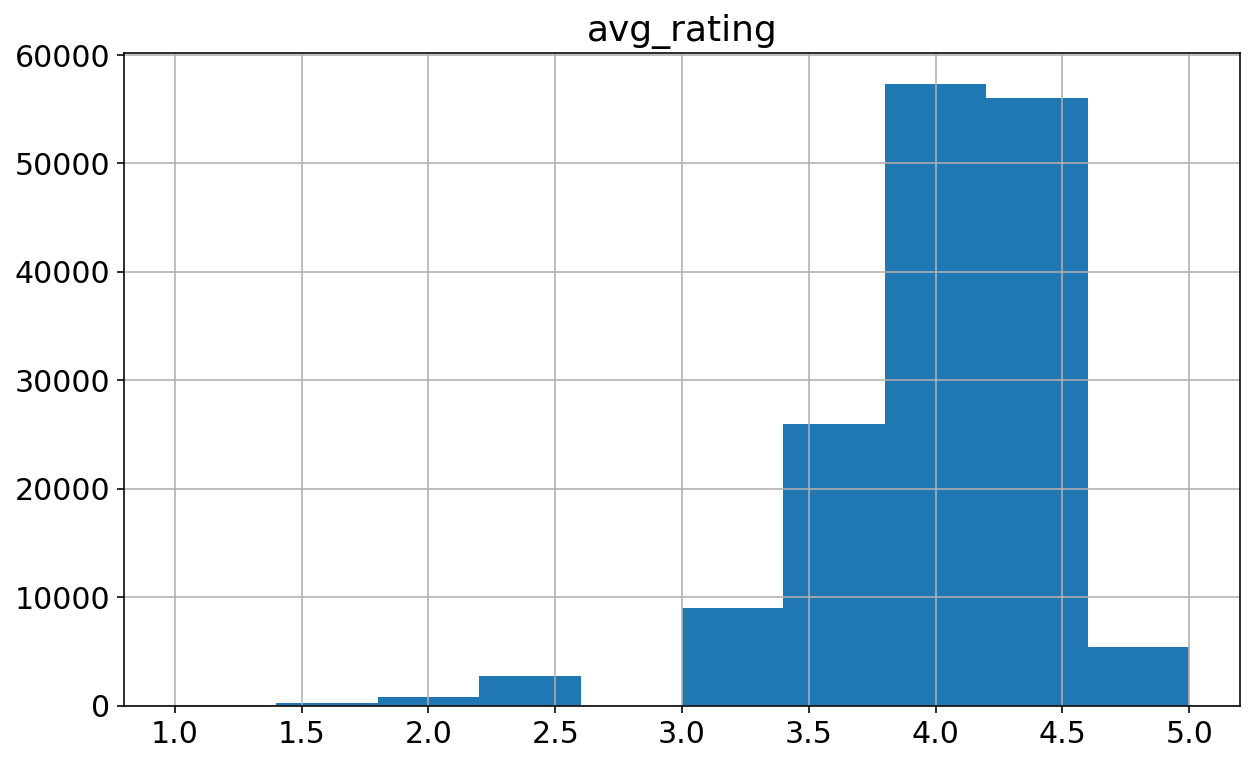

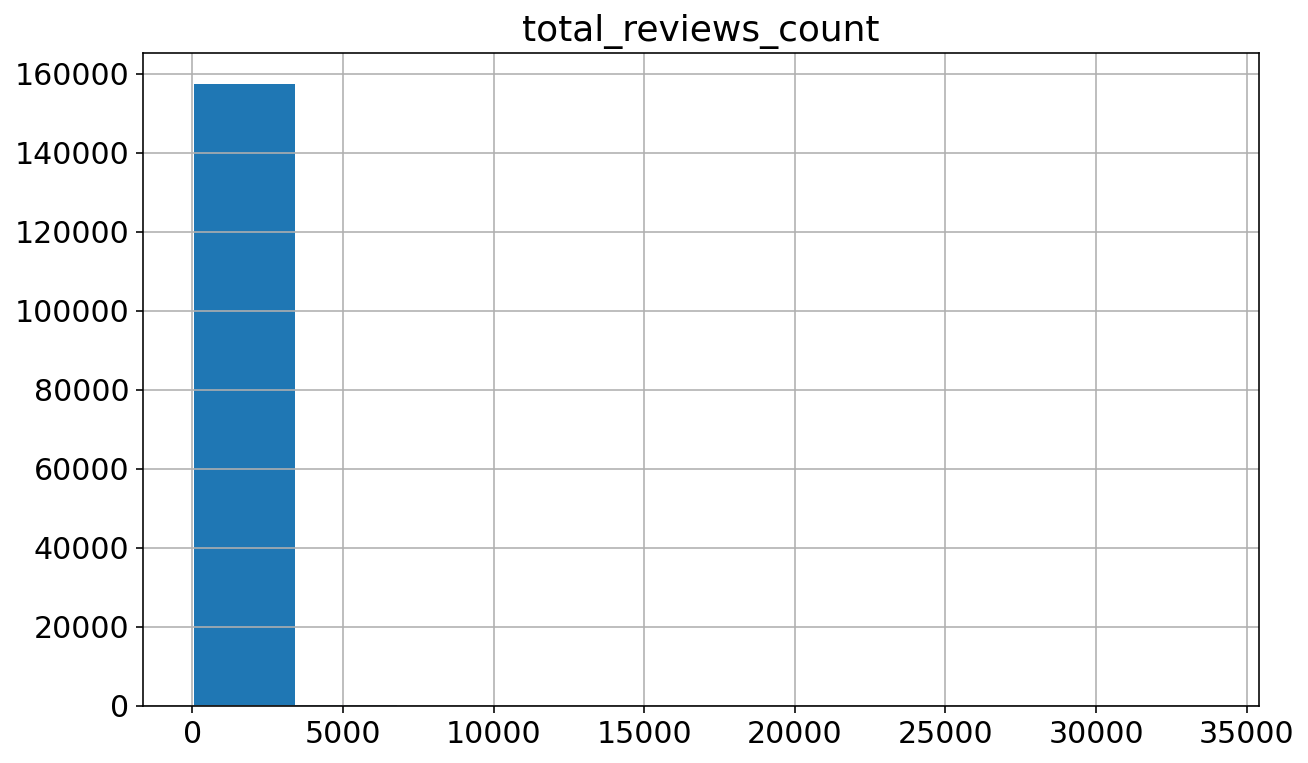

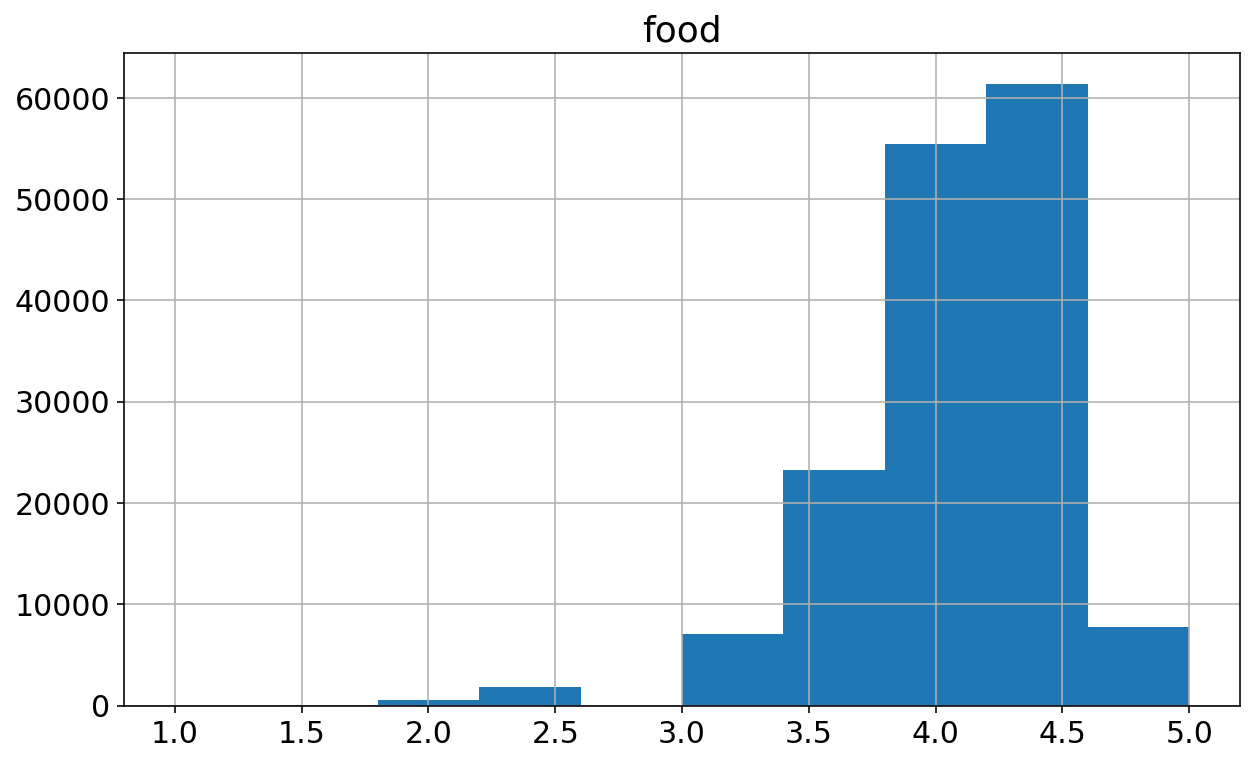

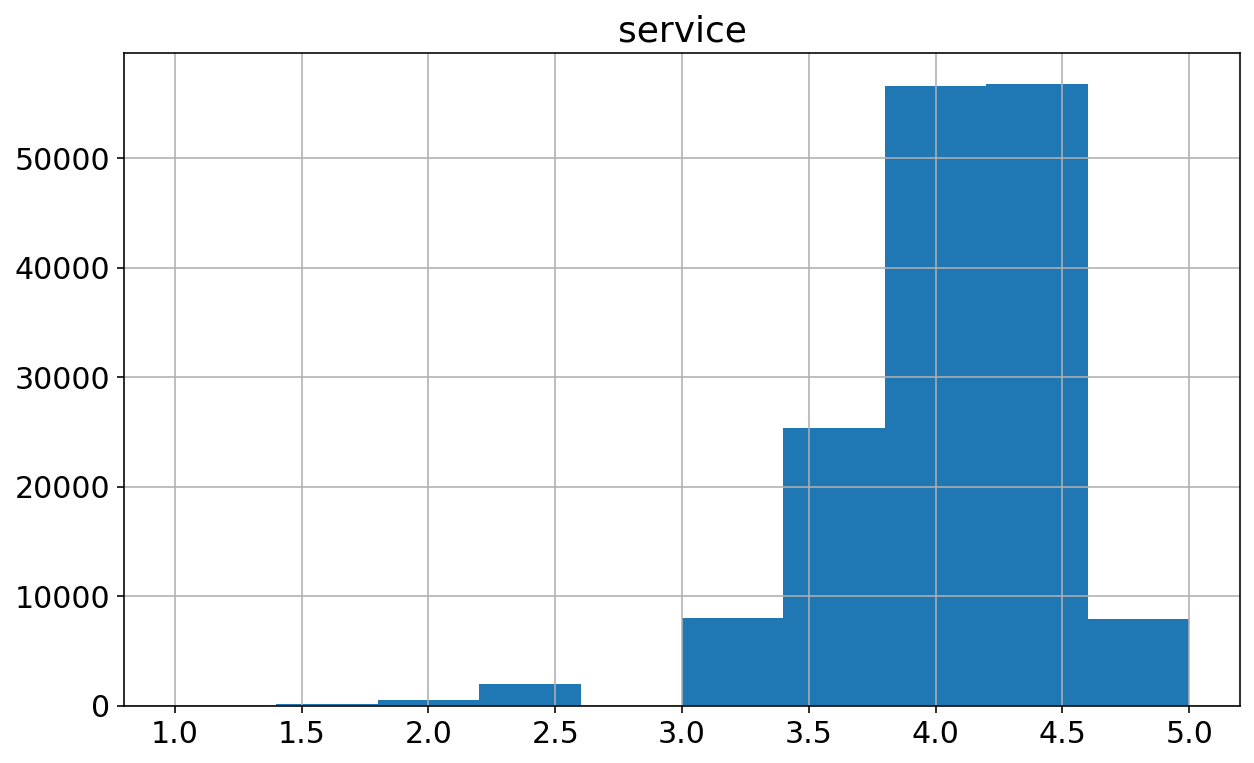

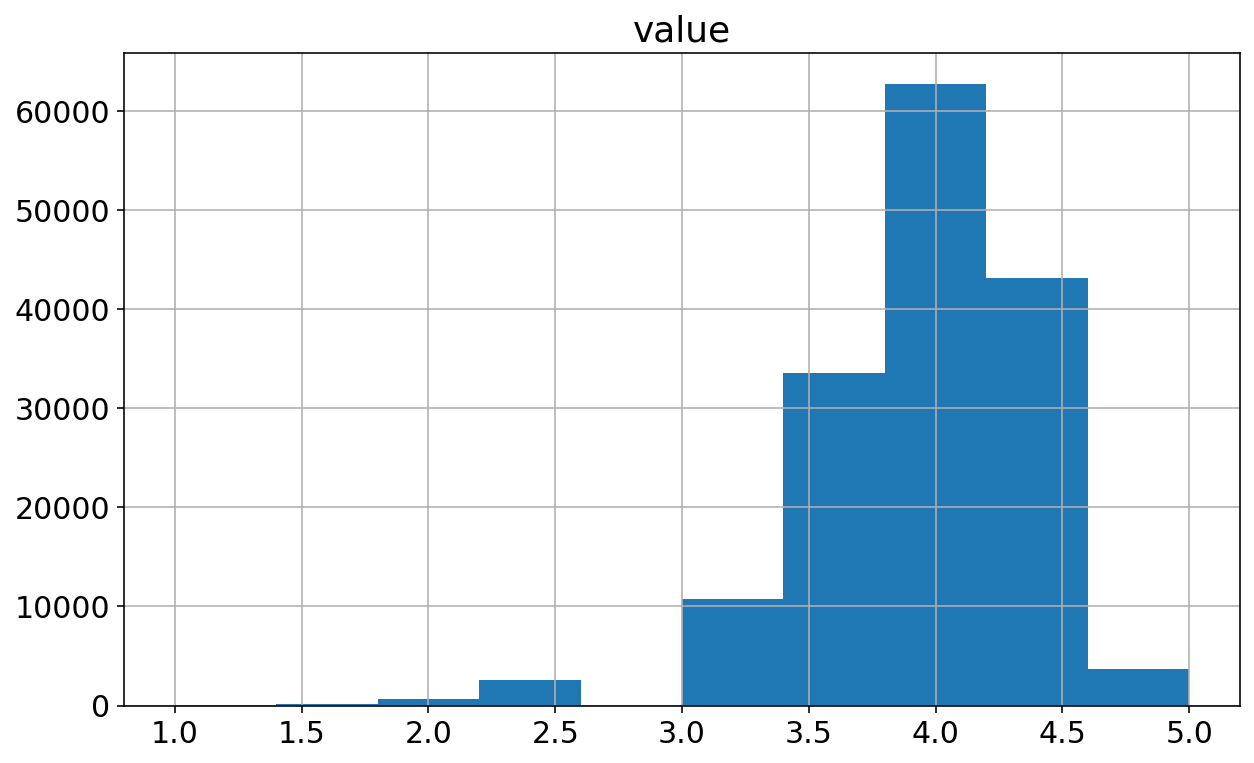

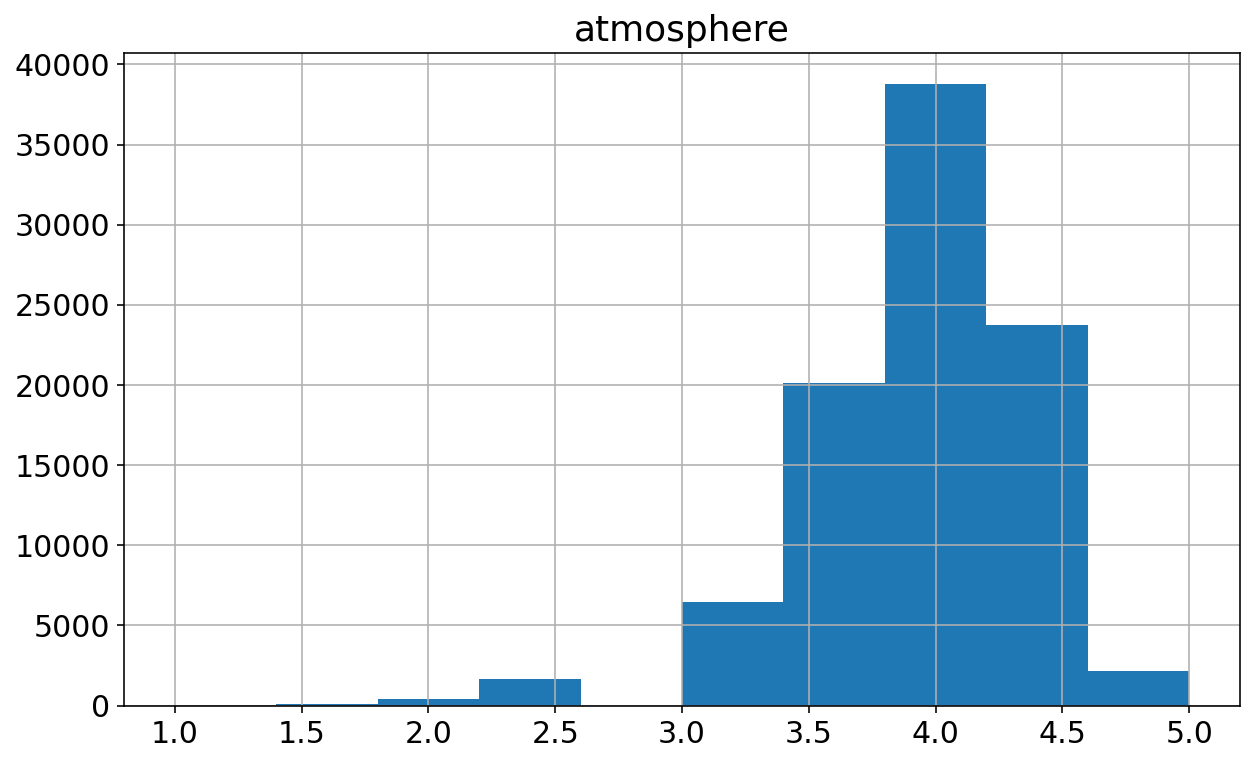

In [53]:
from matplotlib import pyplot as plt

# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["font.size"] = 15

# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

df.hist(column=['avg_rating']);
df.hist(column=['total_reviews_count']);
df.hist(column=['food']);
df.hist(column=['service']);
df.hist(column=['value']);
df.hist(column=['atmosphere']);

**Bar Plots for Categorical features**

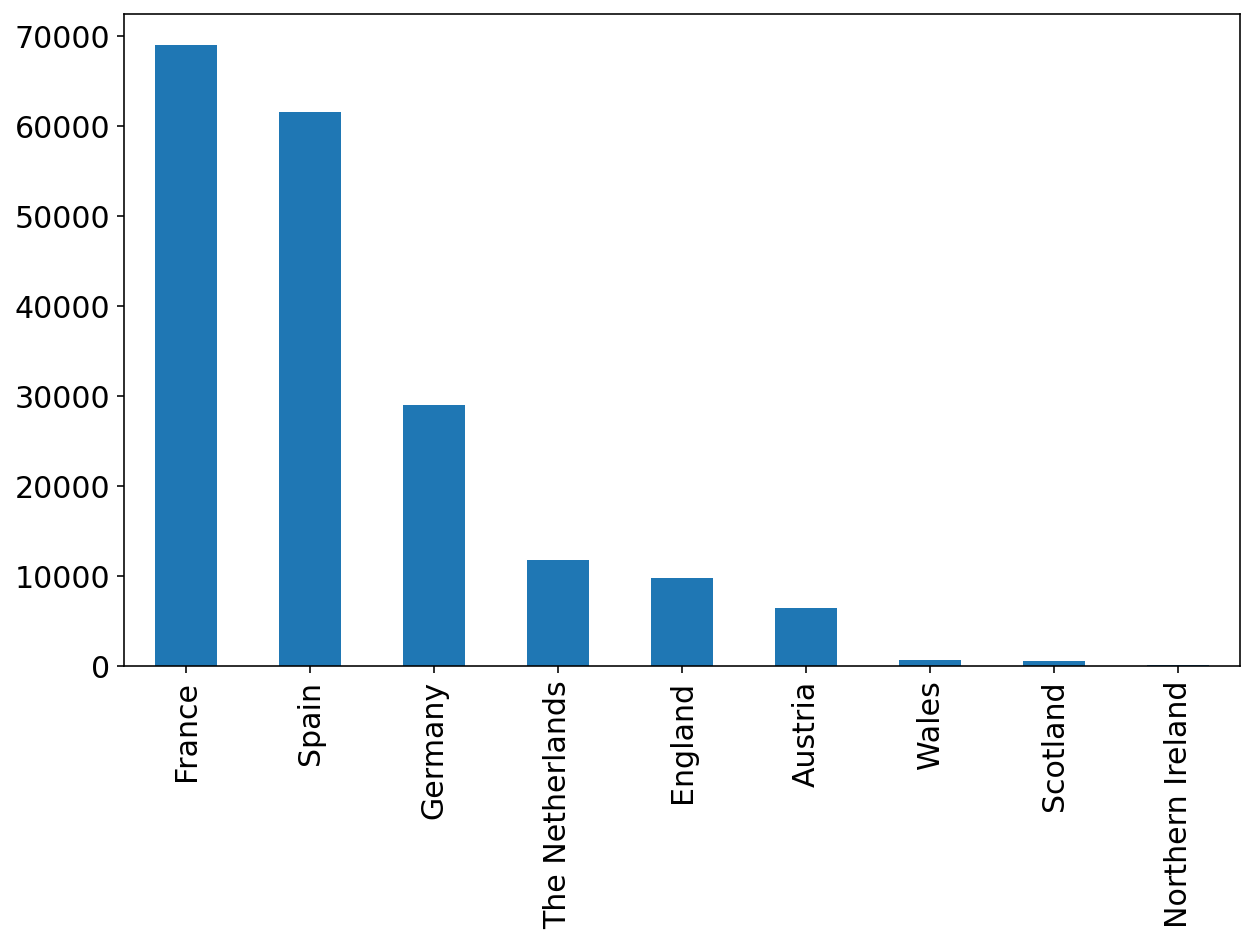

In [54]:
from matplotlib import pyplot as plt

# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["font.size"] = 15

# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'
df['country'].value_counts().plot.bar();

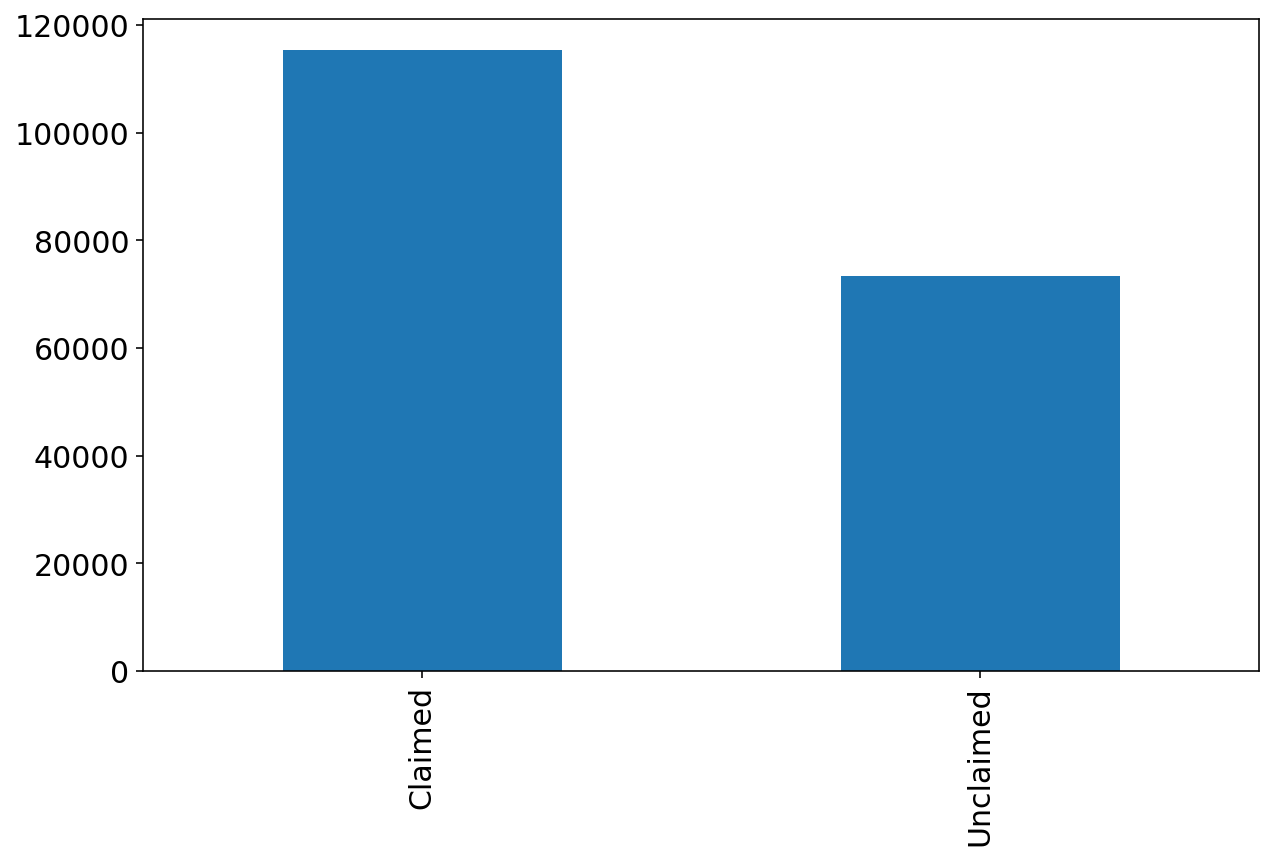

In [55]:
df['claimed'].value_counts().plot.bar();

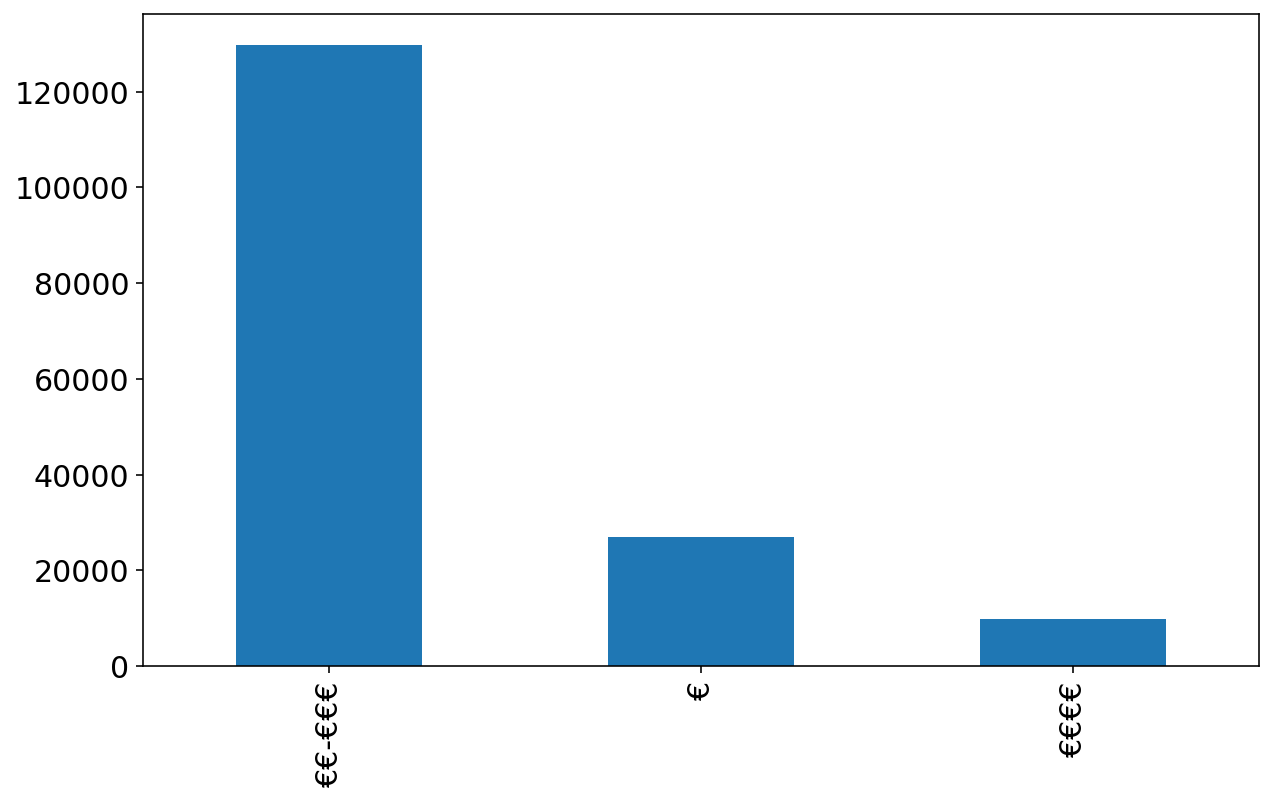

In [56]:
df['price_level'].value_counts().plot.bar();

**Data Quality Issues**

1. Missing Values: 
Remove the missing value row from column **'cuisines','price_level', 'restaurant_name', 'address', 'claimed'**. Since these columns cannot have Nan or 0 values inside it.
Replace empty cell (blanks) with **0** for all Continuous featurs and awards, popularity_detailed, features columns from Categorical features.
2. Irregular: 
Remove too high cardinality columns like restaurants_name, address, popularity_detailed, cuisine, and features categorical features


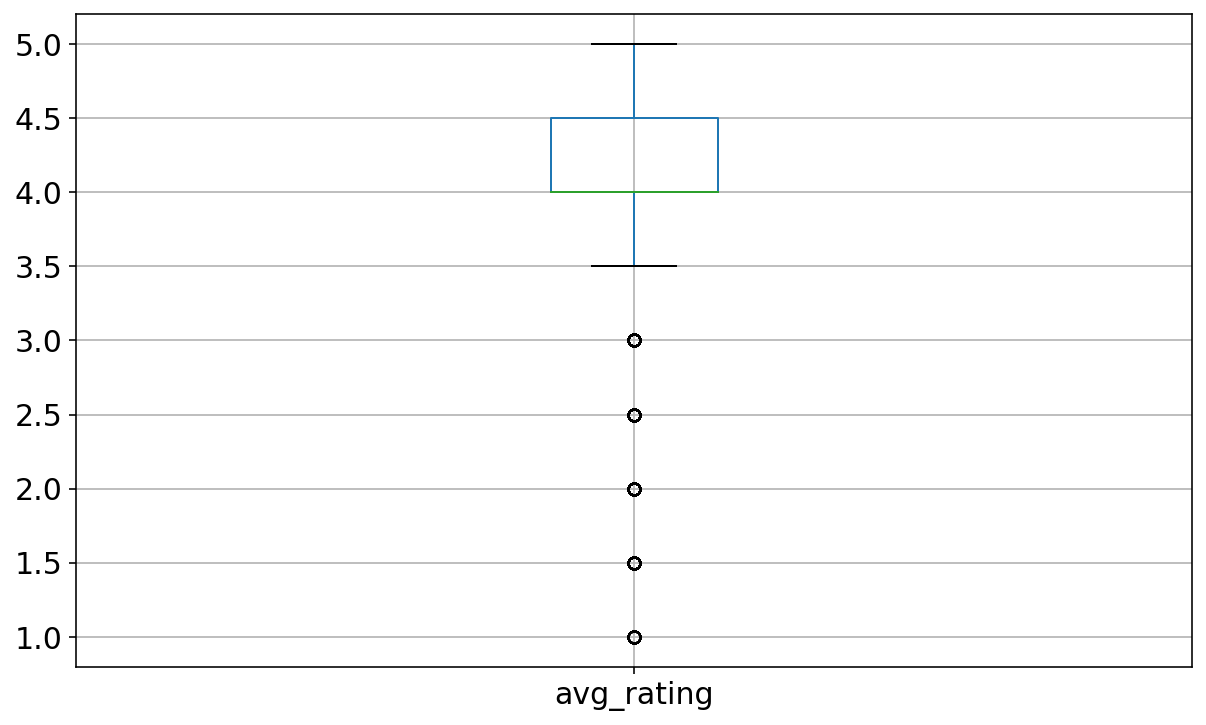

In [57]:
#Box Plot continuous features
df.boxplot('avg_rating');


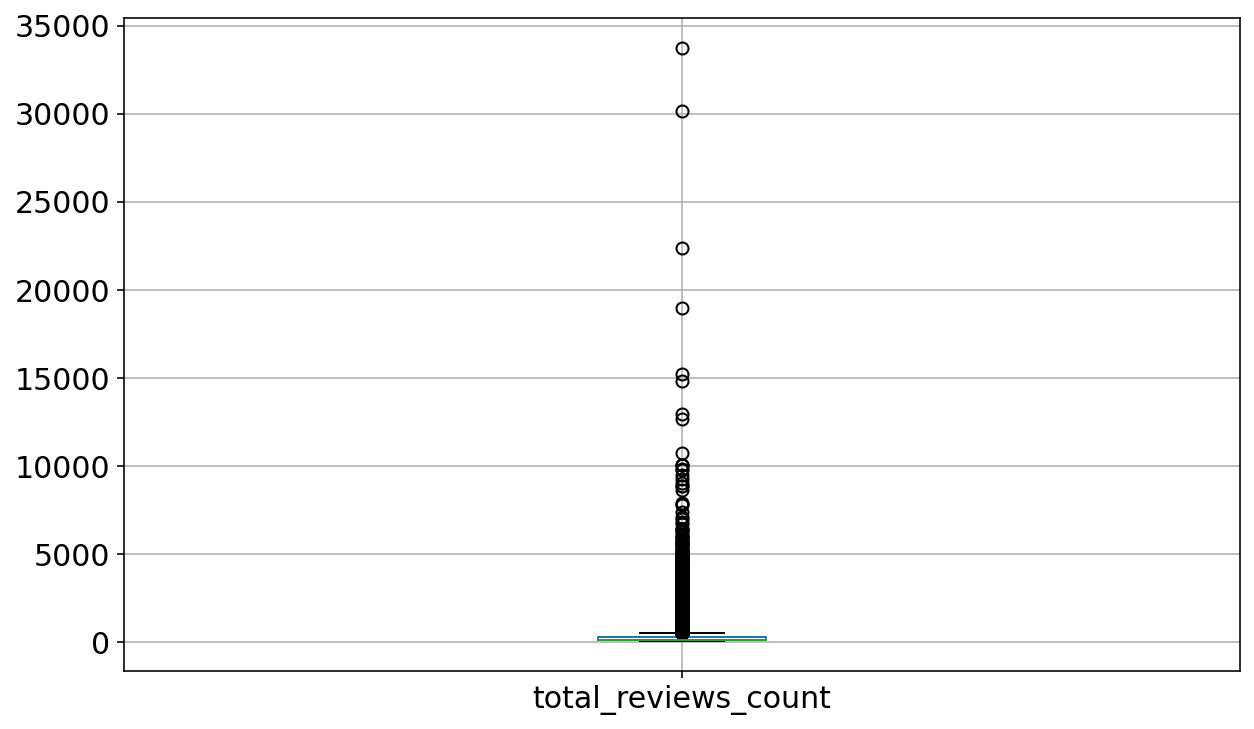

In [58]:
df.boxplot('total_reviews_count');

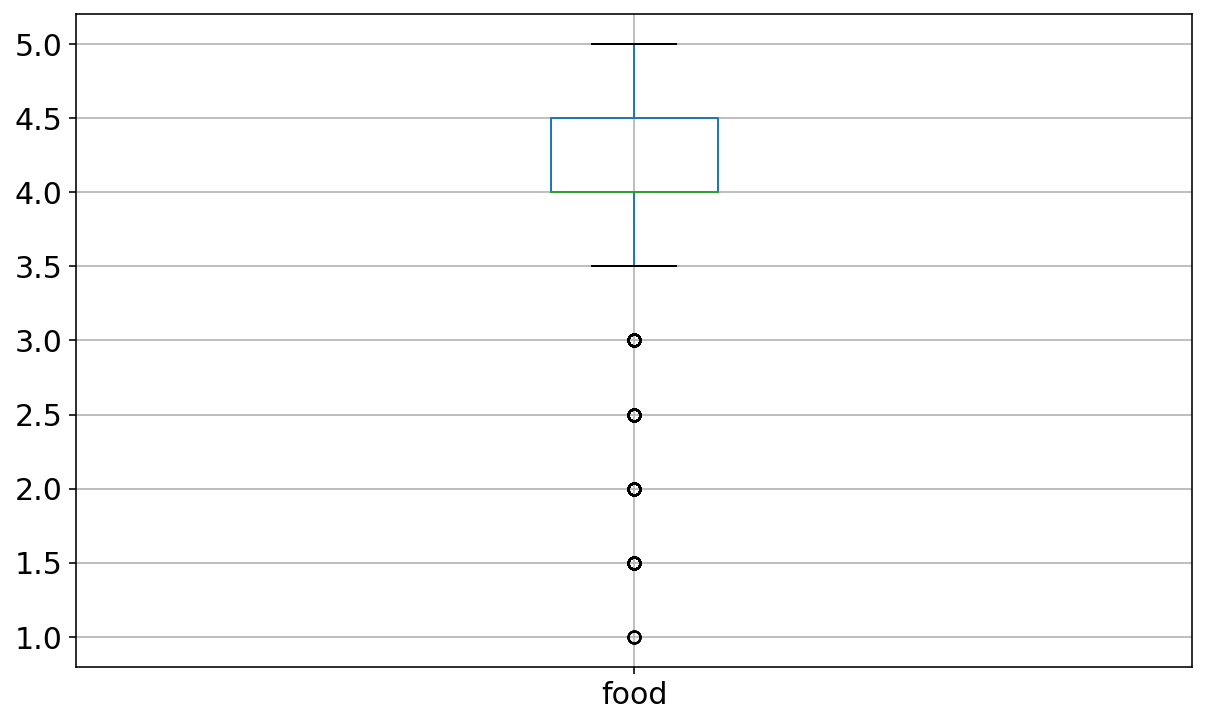

In [59]:
df.boxplot('food');

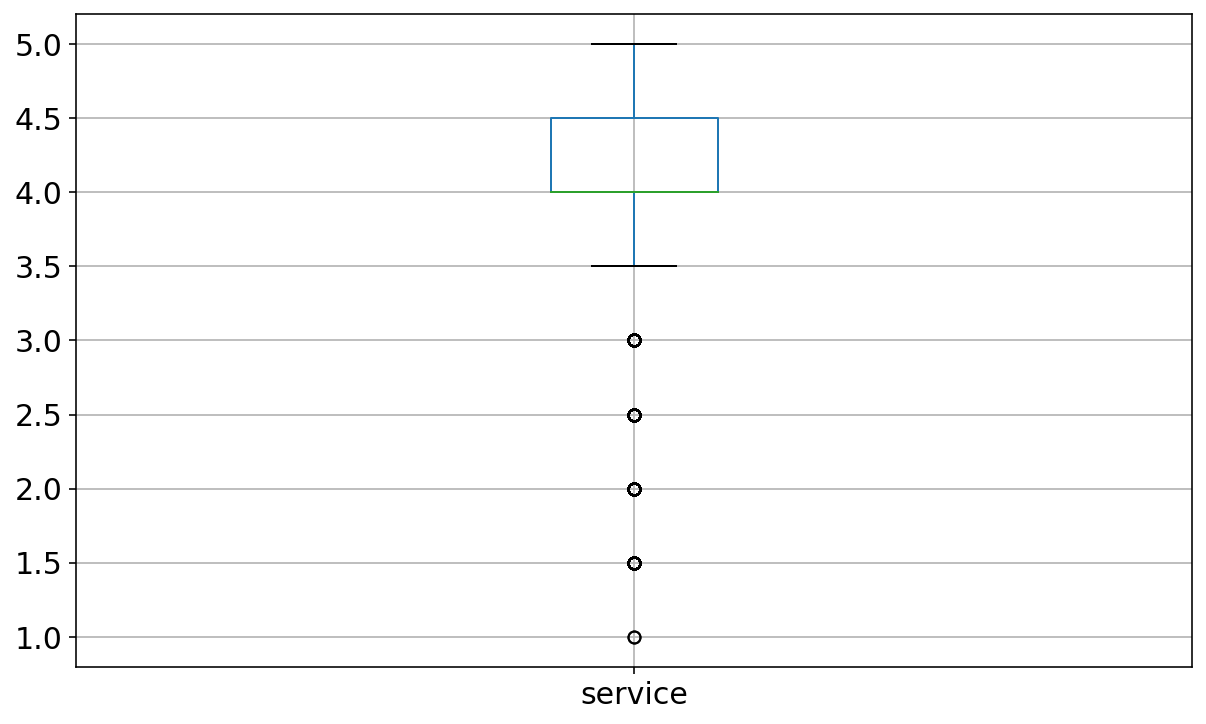

In [60]:
df.boxplot('service');

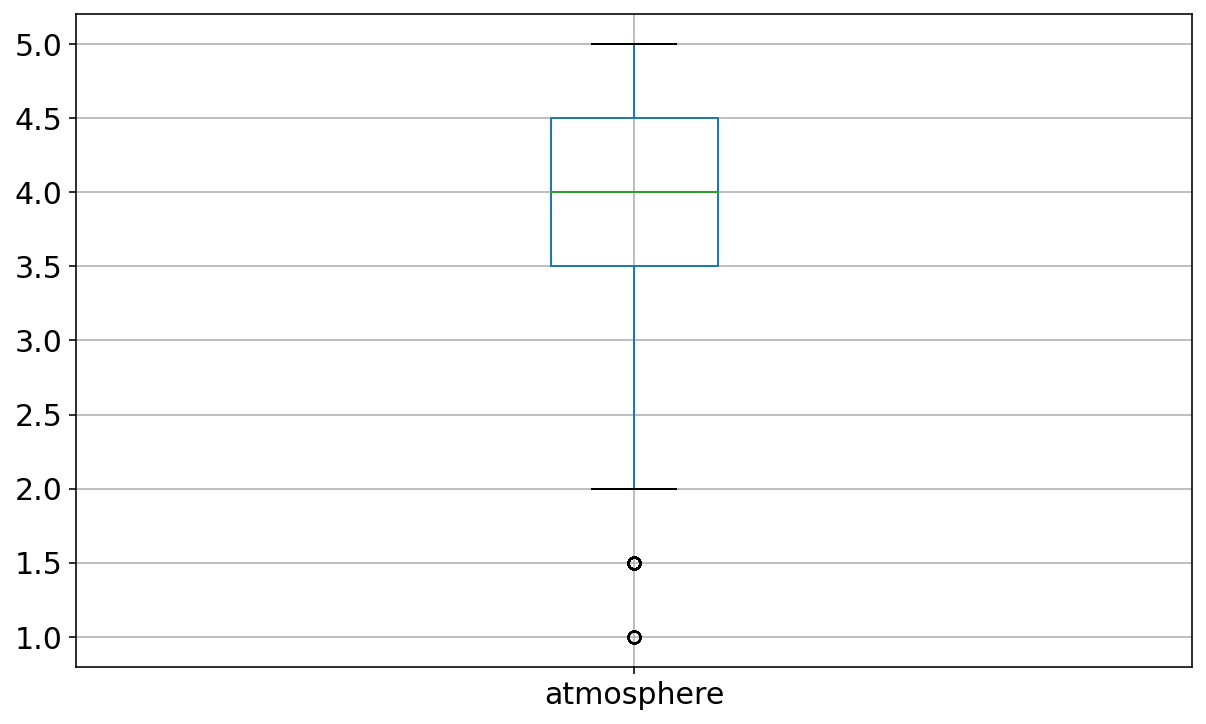

In [61]:
df.boxplot('atmosphere');

3. Outliers: Since all the outliers are true outliers(they represents natural variations in the population and are accpetable).

**Data Quality Plan**

|Attribute   |Description                                         |
|------------|----------------------------------------------------|
|Consistency |No contradications in data                          |
|Accuracy    |Information the data contains corresponds to reality|
|Completeness|All available elements of data is complete          |
|Uniqueness  |A data record with specific column appears only once|

### 3. Data Preparation

#### 3.1 Preprocessing data

In [74]:
 # Removing rows with missing values in the given columns   
df = df.dropna(subset=['cuisines','price_level','claimed'])
df[['features','total_reviews_count','food','service','value','atmosphere']] = df[['features','total_reviews_count','food','service','value','atmosphere']].fillna(0)
print(df)

                  restaurant_name  country  \
5       L'Auberge Du Vieux Crozet   France   
7                       L'entre 2   France   
9                   Chez Claudine   France   
15           Pietra Foci Rocbaron   France   
17                     L'Antidote   France   
...                           ...      ...   
499988            Toby Restaurant  England   
499989        Exe Coffee Roasters  England   
499991      Centre Spot Sport Bar  England   
499996                 Curry King  England   
499999                    Chococo  England   

                                                  address    claimed  \
5       59 place du Puits ancienne adresse le Bourg re...    Claimed   
7            4 route de Saissac, 11310 Saint-Denis France    Claimed   
9       136 rue de la Petite They, 88800 They-sous-Mon...    Claimed   
15            Zac De Fray De Redon, 83136 Rocbaron France    Claimed   
17                      Fray Redon, 83136 Rocbaron France    Claimed   
...            

In [75]:
#Irregular Cardinality
#Removing continuous features having too high cardinality value
df = df.drop('restaurant_name', axis=1) 
df = df.drop('address', axis=1) 

In [76]:
#Removing columns to maintain uniqueness
df = df.drop('excellent', axis=1)
df = df.drop('very_good', axis=1)
df = df.drop('average', axis=1)
df = df.drop('poor', axis=1)
df = df.drop('terrible', axis=1)
print(df)

        country    claimed                                             awards  \
5        France    Claimed  Travellers' Choice, Certificate of Excellence ...   
7        France    Claimed  Travellers' Choice, Certificate of Excellence ...   
9        France    Claimed  Travellers' Choice, Certificate of Excellence ...   
15       France    Claimed                                                NaN   
17       France    Claimed  Travellers' Choice, Certificate of Excellence ...   
...         ...        ...                                                ...   
499988  England  Unclaimed                                                NaN   
499989  England  Unclaimed                     Certificate of Excellence 2019   
499991  England  Unclaimed                                                NaN   
499996  England  Unclaimed                     Certificate of Excellence 2019   
499999  England    Claimed  Certificate of Excellence 2019, Certificate of...   

                           

### 4. Data Insights


#### 4.1 Correlation HeatMap

In [78]:
#Correlation Table
import seaborn as sb
df.corr()

,avg_rating,total_reviews_count,food,service,value,atmosphere
avg_rating,1.000000,0.064801,0.792607,0.784572,0.751322,-0.000055
total_reviews_count,0.064801,1.000000,0.160803,0.153681,0.136001,0.262075
food,0.792607,0.160803,1.000000,0.955945,0.953984,0.237229
service,0.784572,0.153681,0.955945,1.000000,0.951020,0.227726
value,0.751322,0.136001,0.953984,0.951020,1.000000,0.217334
atmosphere,-0.000055,0.262075,0.237229,0.227726,0.217334,1.000000


<AxesSubplot:>

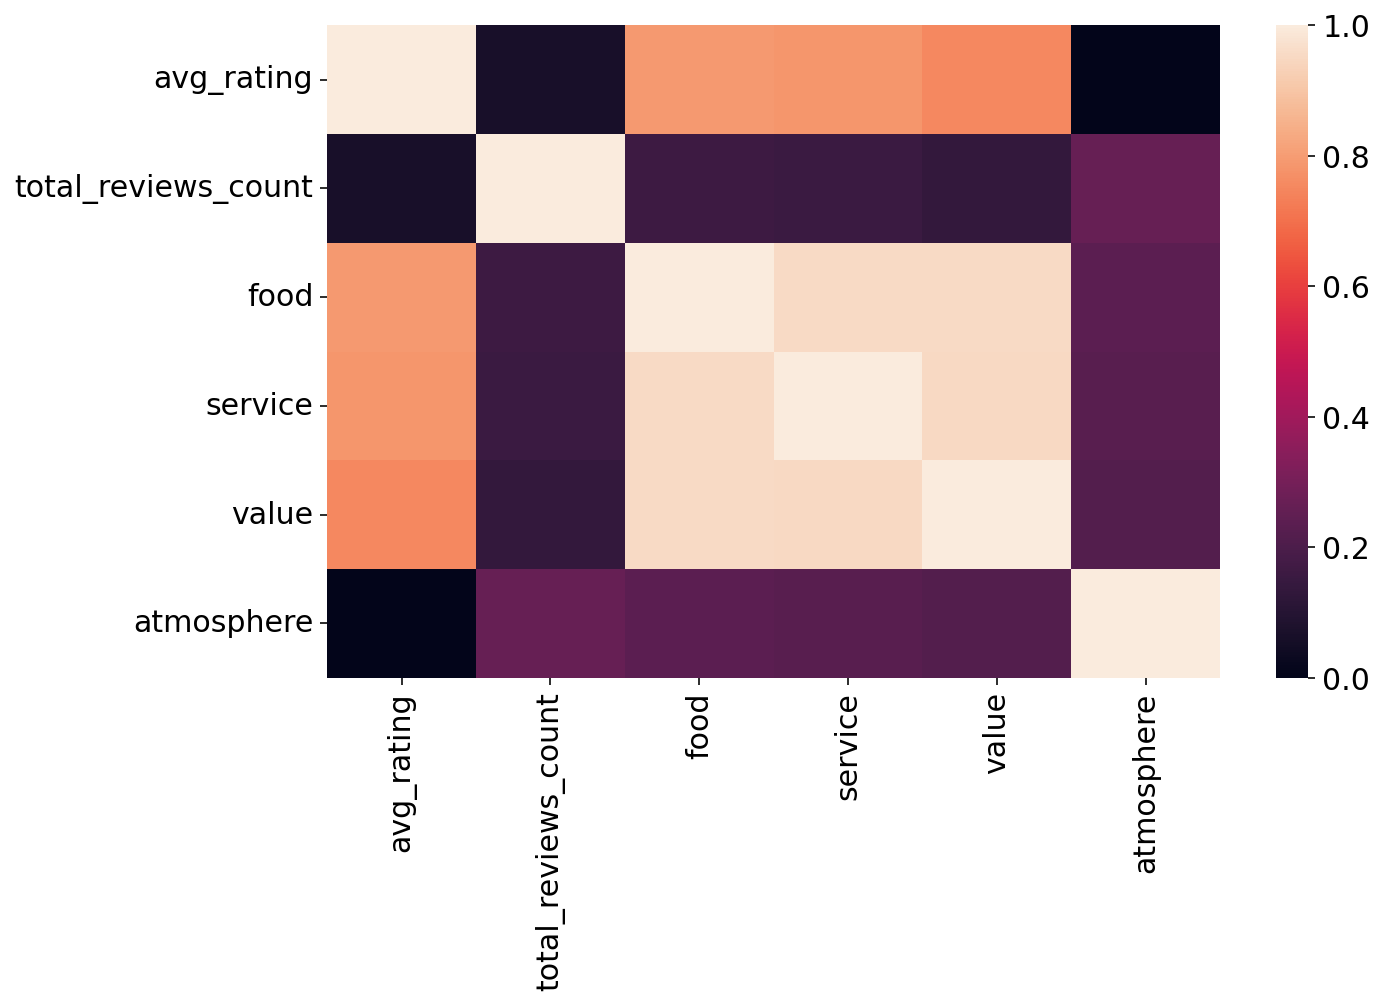

In [79]:
#Generation of HeatMap
sb.heatmap(df.corr())

**4.1.1 Hypotheses**
    Following are the descriptive features that correlate with the target feature in the given order.
    1. __Food__: The targeted feature and this descriptive feature have a correlation of 0.770476, which is the highest of all the features. This demonstrates that customers place a higher value on food than they do on ambience, level of service, or pricing. The higher the quality of food, the better the rating provided by the user and the greater the contribution to the average rating.
       __Service__: The correlation between this descriptive feature and the target feature is 0.769711, which is the second highest among all the features. This proves that customers value the service a lot, only second to the quality and taste of the food offered.
    2. Following are the domain concepts that are highly correlated.
        __Food, Service and Value__: These domain concepts have a very strong positive correlation close to +1. If the rating for food is higher, then there is a significantly higher chance of having an equally good rating for service and value as well.
    3. Following are the features that are useless for predictive models:
        __Claimed__: This feature shows if a restaurant has claimed its patrons' reviews, which is meaningless because we lack information on the specific steps the establishment took after claiming the reviews.
        __Excellent,very good,average,poor and terrible__: These features are repetitive and are collectively represented by the feature avg_rating and hence wouldn't contribute much to a predictive model 
        popularity_detailed: This feature in particular has a very high cardinality rate and thus

### References:

1. https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed <a id='3'></a>

### References:
    1.https://stackoverflow.com/questions/39409866/correlation-heatmap
    2.https://www.machinelearningplus.com/plots/python-boxplot/